In [17]:
# import libraries
import pandas as pd

#nltk.download('all')
import nltk


from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
import warnings

warnings.filterwarnings('ignore')
# Load the amazon review dataset

df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [18]:
# Tokenize the text
idx = 19998
df['reviewText'].iloc[idx]

'I love love love this app on my side of fashion story their are no fights and a wonderful app I love it u should really get it nearly the best app ever u should get it!!!!!!!!!! but ignore fashion story for safty!!!!!  oh and its totally free but about t'

In [19]:
tokens = word_tokenize(df['reviewText'].iloc[idx].lower())

tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'app',
 'on',
 'my',
 'side',
 'of',
 'fashion',
 'story',
 'their',
 'are',
 'no',
 'fights',
 'and',
 'a',
 'wonderful',
 'app',
 'i',
 'love',
 'it',
 'u',
 'should',
 'really',
 'get',
 'it',
 'nearly',
 'the',
 'best',
 'app',
 'ever',
 'u',
 'should',
 'get',
 'it',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 'but',
 'ignore',
 'fashion',
 'story',
 'for',
 'safty',
 '!',
 '!',
 '!',
 '!',
 '!',
 'oh',
 'and',
 'its',
 'totally',
 'free',
 'but',
 'about',
 't']

In [20]:
# Remove stop words

from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
eng_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

filtered_tokens

['love',
 'love',
 'love',
 'app',
 'side',
 'fashion',
 'story',
 'fights',
 'wonderful',
 'app',
 'love',
 'u',
 'really',
 'get',
 'nearly',
 'best',
 'app',
 'ever',
 'u',
 'get',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 'ignore',
 'fashion',
 'story',
 'safty',
 '!',
 '!',
 '!',
 '!',
 '!',
 'oh',
 'totally',
 'free']

In [22]:
# Lemmatize the tokens

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

lemmatized_tokens

['love',
 'love',
 'love',
 'app',
 'side',
 'fashion',
 'story',
 'fight',
 'wonderful',
 'app',
 'love',
 'u',
 'really',
 'get',
 'nearly',
 'best',
 'app',
 'ever',
 'u',
 'get',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 'ignore',
 'fashion',
 'story',
 'safty',
 '!',
 '!',
 '!',
 '!',
 '!',
 'oh',
 'totally',
 'free']

In [23]:
processed_text = ' '.join(lemmatized_tokens)
processed_text

'love love love app side fashion story fight wonderful app love u really get nearly best app ever u get ! ! ! ! ! ! ! ! ! ! ignore fashion story safty ! ! ! ! ! oh totally free'

In [24]:
df['reviewText'].iloc[idx]

'I love love love this app on my side of fashion story their are no fights and a wonderful app I love it u should really get it nearly the best app ever u should get it!!!!!!!!!! but ignore fashion story for safty!!!!!  oh and its totally free but about t'

In [25]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


In [26]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['sentiment'] = df['reviewText'].apply(get_sentiment)

df

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



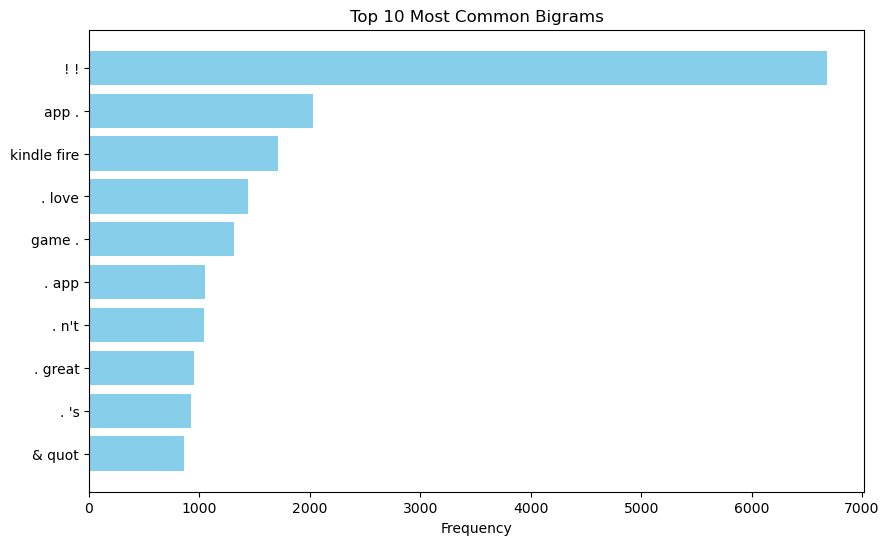

In [29]:
from nltk import FreqDist, bigrams
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Combine all reviews into one text to analyze bigrams across the dataset
all_text = " ".join(df['reviewText'].values)

# Tokenize and calculate bigram frequencies
words = word_tokenize(all_text.lower())
bigrams_list = list(bigrams(words))
bigram_freq = FreqDist(bigrams_list)

# Get the top 10 most common bigrams
top_bigrams = bigram_freq.most_common(10)

# Prepare data for visualization
bigram_words = [" ".join(bigram) for bigram, freq in top_bigrams]
bigram_counts = [freq for bigram, freq in top_bigrams]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(bigram_words, bigram_counts, color="skyblue")
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Bigrams")
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent bigram at the top
plt.show()


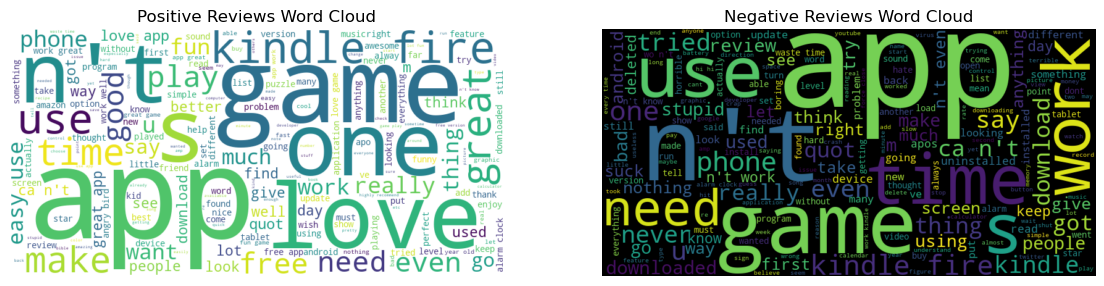

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 1]['reviewText'])
negative_reviews = " ".join(df[df['sentiment'] == 0]['reviewText'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plot
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud")
plt.axis('off')

plt.show()
